Subject Info:
     Subject  Age Gender  Recording year  Number of subtractions  \
0  Subject00   21      F            2011                    9.70   
1  Subject01   18      F            2011                   29.35   
2  Subject02   19      F            2012                   12.88   
3  Subject03   17      F            2010                   31.00   
4  Subject04   17      F            2010                    8.60   

   Count quality  
0              0  
1              1  
2              1  
3              1  
4              0  
Extracting EDF parameters from C:\Users\Admin\Desktop\mytempml\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\Admin\Desktop\mytempml\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf

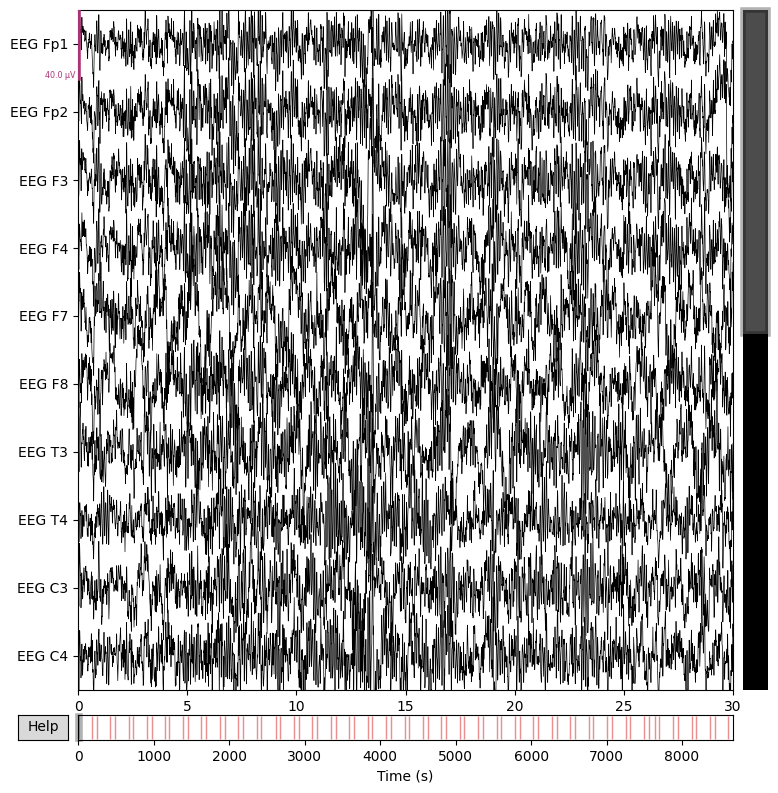


Example Subject Information:
      Subject  Age Gender  Recording year  Number of subtractions  \
0   Subject00   21      F            2011                    9.70   
1   Subject01   18      F            2011                   29.35   
2   Subject02   19      F            2012                   12.88   
3   Subject03   17      F            2010                   31.00   
4   Subject04   17      F            2010                    8.60   
5   Subject05   16      F            2010                   20.71   
6   Subject06   18      M            2011                    4.35   
7   Subject07   18      F            2012                   13.38   
8   Subject08   26      M            2011                   18.24   
9   Subject09   16      F            2010                    7.00   
10  Subject10   17      F            2010                    1.00   
11  Subject11   18      F            2010                   26.00   
12  Subject12   17      F            2010                   26.36   
13  

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 4.096 (s)


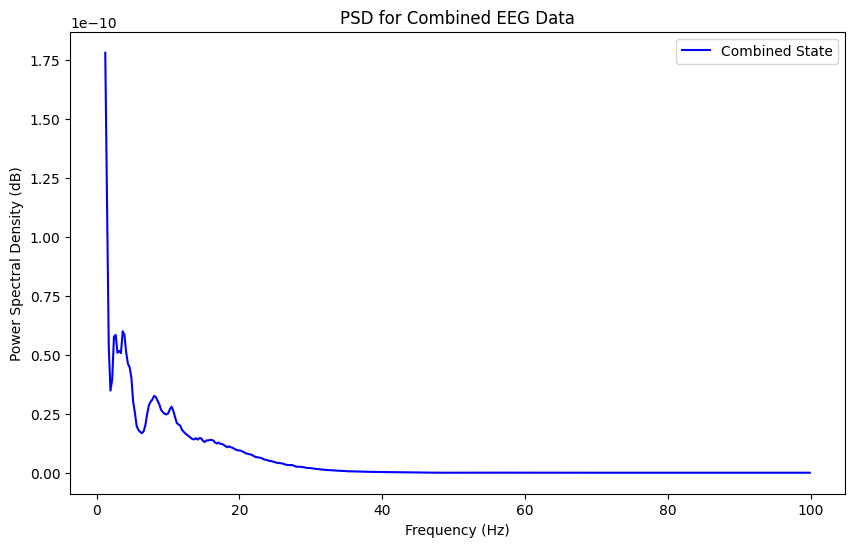

Combined State Band Powers:
Delta: 6.768669057901901e-11
Theta: 2.887798302623517e-11
Alpha: 2.5652889005414864e-11
Beta: 8.547710312456638e-12
Gamma: 1.3960393371489784e-13
Extracting EDF parameters from C:\Users\Admin\Desktop\mytempml\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\Admin\Desktop\mytempml\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\Admin\Desktop\mytempml\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Crea

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 36 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


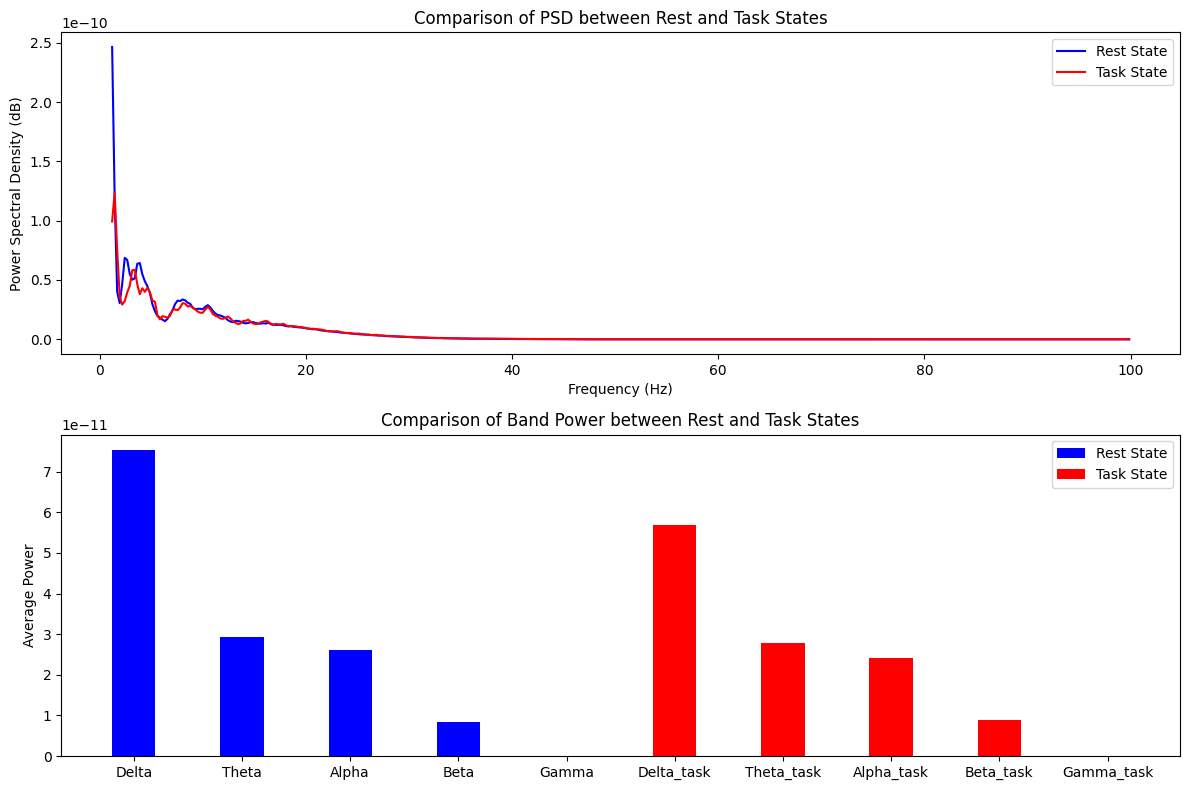

In [6]:
import os
import pandas as pd
import mne
import numpy as np  # Ensure NumPy is imported
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from mne.time_frequency import psd_array_welch

# Directory containing the EEG data files and the CSV file
eeg_data_dir = r'C:\Users\Admin\Desktop\mytempml\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0'

# Read the subject-info.csv file
csv_path = os.path.join(eeg_data_dir, 'subject-info.csv')
subject_info = pd.read_csv(csv_path)
print("Subject Info:")
print(subject_info.head())

# List all EDF files in the directory
edf_files = [f for f in os.listdir(eeg_data_dir) if f.endswith('.edf')]

# Initialize an empty list to hold the raw objects
raw_list = []

# Loop through each EDF file and read it
for edf_file in edf_files:
    edf_path = os.path.join(eeg_data_dir, edf_file)
    raw = mne.io.read_raw_edf(edf_path, preload=True)
    raw_list.append(raw)

# Concatenate all raw objects into a single raw object
raw_combined = mne.concatenate_raws(raw_list)

# Print the info of the combined raw object
print(raw_combined.info)

# Plot a sample of the raw data
raw_combined.plot(n_channels=10, duration=30, start=0)

# Example of using the subject information
# Assuming the CSV file has columns like 'Subject', 'Age', 'Gender', etc.
# You can join or merge this information with your EEG data for further analysis
print("\nExample Subject Information:")
print(subject_info)

raw_combined.filter(1., 100., fir_design='firwin')

# Extract data and sampling frequency
data_combined = raw_combined.get_data()
sfreq = raw_combined.info['sfreq']

# Calculate PSD using Welch's method
psds_combined, freqs_combined = psd_array_welch(data_combined, sfreq=sfreq, fmin=1., fmax=100., n_fft=2048)


def band_power(psds, freqs, band):
    band_idx = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.mean(psds[:, band_idx], axis=1)

# Define frequency bands
delta_band = (1, 4)
theta_band = (4, 8)
alpha_band = (8, 12)
beta_band = (12, 30)
gamma_band = (30, 100)

# Calculate band power for the combined data
delta_power_combined = band_power(psds_combined, freqs_combined, delta_band)
theta_power_combined = band_power(psds_combined, freqs_combined, theta_band)
alpha_power_combined = band_power(psds_combined, freqs_combined, alpha_band)
beta_power_combined = band_power(psds_combined, freqs_combined, beta_band)
gamma_power_combined = band_power(psds_combined, freqs_combined, gamma_band)

plt.figure(figsize=(10, 6))
plt.plot(freqs_combined, np.mean(psds_combined, axis=0), label='Combined State', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('PSD for Combined EEG Data')
plt.legend()
plt.show()

print("Combined State Band Powers:")
print(f"Delta: {np.mean(delta_power_combined)}")
print(f"Theta: {np.mean(theta_power_combined)}")
print(f"Alpha: {np.mean(alpha_power_combined)}")
print(f"Beta: {np.mean(beta_power_combined)}")
print(f"Gamma: {np.mean(gamma_power_combined)}")

# List all EDF files in the directory for rest and task states
edf_files = [f for f in os.listdir(eeg_data_dir) if f.endswith('.edf')]
raw_rest_list = []
raw_task_list = []

# Loop through each EDF file and read it into appropriate lists
for edf_file in edf_files:
    edf_path = os.path.join(eeg_data_dir, edf_file)
    if edf_file.endswith('_1.edf'):  # Rest state
        raw_rest = mne.io.read_raw_edf(edf_path, preload=True)
        raw_rest_list.append(raw_rest)
    elif edf_file.endswith('_2.edf'):  # Task state
        raw_task = mne.io.read_raw_edf(edf_path, preload=True)
        raw_task_list.append(raw_task)

# Concatenate all raw objects into single raw objects for rest and task states
raw_combined_rest = mne.concatenate_raws(raw_rest_list)
raw_combined_task = mne.concatenate_raws(raw_task_list)

# Filter the data
raw_combined_rest.filter(1., 100., fir_design='firwin')
raw_combined_task.filter(1., 100., fir_design='firwin')

# Calculate PSD using Welch's method
psds_rest, freqs_rest = psd_array_welch(raw_combined_rest.get_data(), sfreq=raw_combined_rest.info['sfreq'], fmin=1., fmax=100., n_fft=2048)
psds_task, freqs_task = psd_array_welch(raw_combined_task.get_data(), sfreq=raw_combined_task.info['sfreq'], fmin=1., fmax=100., n_fft=2048)

# Define frequency bands
delta_band = (1, 4)
theta_band = (4, 8)
alpha_band = (8, 12)
beta_band = (12, 30)
gamma_band = (30, 100)

# Function to calculate band power
def band_power(psds, freqs, band):
    band_idx = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.mean(psds[:, band_idx], axis=1)

# Calculate band power for each state
delta_power_rest = band_power(psds_rest, freqs_rest, delta_band)
theta_power_rest = band_power(psds_rest, freqs_rest, theta_band)
alpha_power_rest = band_power(psds_rest, freqs_rest, alpha_band)
beta_power_rest = band_power(psds_rest, freqs_rest, beta_band)
gamma_power_rest = band_power(psds_rest, freqs_rest, gamma_band)

delta_power_task = band_power(psds_task, freqs_task, delta_band)
theta_power_task = band_power(psds_task, freqs_task, theta_band)
alpha_power_task = band_power(psds_task, freqs_task, alpha_band)
beta_power_task = band_power(psds_task, freqs_task, beta_band)
gamma_power_task = band_power(psds_task, freqs_task, gamma_band)

# Example plot to compare PSDs
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(freqs_rest, np.mean(psds_rest, axis=0), label='Rest State', color='blue')
plt.plot(freqs_task, np.mean(psds_task, axis=0), label='Task State', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Comparison of PSD between Rest and Task States')
plt.legend()

plt.subplot(2, 1, 2)
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
rest_means = [delta_power_rest.mean(), theta_power_rest.mean(), alpha_power_rest.mean(), beta_power_rest.mean(), gamma_power_rest.mean()]
task_means = [delta_power_task.mean(), theta_power_task.mean(), alpha_power_task.mean(), beta_power_task.mean(), gamma_power_task.mean()]
plt.bar(bands, rest_means, width=0.4, label='Rest State', color='blue')
plt.bar([bands[i] + "_task" for i in range(len(bands))], task_means, width=0.4, label='Task State', color='red')

plt.ylabel('Average Power')
plt.title('Comparison of Band Power between Rest and Task States')
plt.legend()

plt.tight_layout()
plt.show()


Filtering raw data in 71 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 71 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


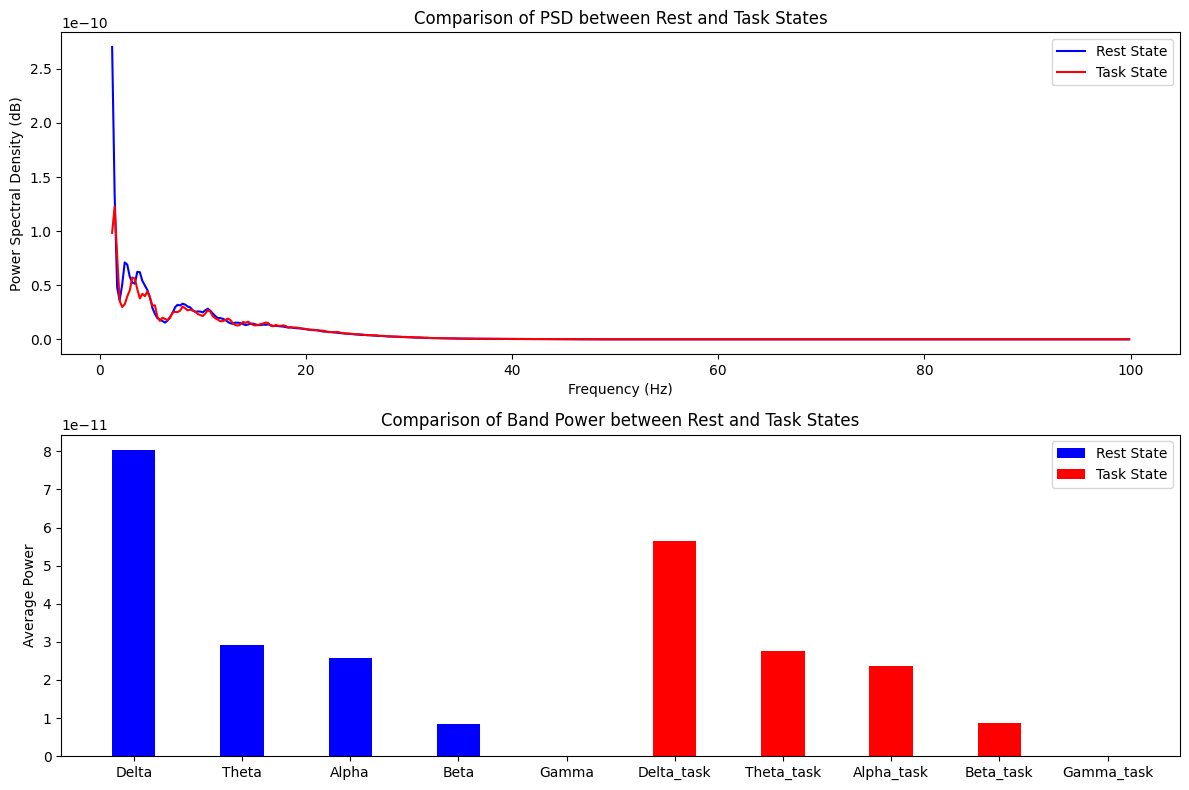

In [7]:
raw_combined_rest = mne.concatenate_raws(raw_rest_list)
raw_combined_task = mne.concatenate_raws(raw_task_list)

# Filter the data
raw_combined_rest.filter(1., 100., fir_design='firwin')
raw_combined_task.filter(1., 100., fir_design='firwin')

# Calculate PSD using Welch's method
psds_rest, freqs_rest = psd_array_welch(raw_combined_rest.get_data(), sfreq=raw_combined_rest.info['sfreq'], fmin=1., fmax=100., n_fft=2048)
psds_task, freqs_task = psd_array_welch(raw_combined_task.get_data(), sfreq=raw_combined_task.info['sfreq'], fmin=1., fmax=100., n_fft=2048)

# Define frequency bands
delta_band = (1, 4)
theta_band = (4, 8)
alpha_band = (8, 12)
beta_band = (12, 30)
gamma_band = (30, 100)

# Function to calculate band power
def band_power(psds, freqs, band):
    band_idx = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.mean(psds[:, band_idx], axis=1)

# Calculate band power for each state
delta_power_rest = band_power(psds_rest, freqs_rest, delta_band)
theta_power_rest = band_power(psds_rest, freqs_rest, theta_band)
alpha_power_rest = band_power(psds_rest, freqs_rest, alpha_band)
beta_power_rest = band_power(psds_rest, freqs_rest, beta_band)
gamma_power_rest = band_power(psds_rest, freqs_rest, gamma_band)

delta_power_task = band_power(psds_task, freqs_task, delta_band)
theta_power_task = band_power(psds_task, freqs_task, theta_band)
alpha_power_task = band_power(psds_task, freqs_task, alpha_band)
beta_power_task = band_power(psds_task, freqs_task, beta_band)
gamma_power_task = band_power(psds_task, freqs_task, gamma_band)

# Example plot to compare PSDs
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(freqs_rest, np.mean(psds_rest, axis=0), label='Rest State', color='blue')
plt.plot(freqs_task, np.mean(psds_task, axis=0), label='Task State', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Comparison of PSD between Rest and Task States')
plt.legend()

plt.subplot(2, 1, 2)
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
rest_means = [delta_power_rest.mean(), theta_power_rest.mean(), alpha_power_rest.mean(), beta_power_rest.mean(), gamma_power_rest.mean()]
task_means = [delta_power_task.mean(), theta_power_task.mean(), alpha_power_task.mean(), beta_power_task.mean(), gamma_power_task.mean()]
plt.bar(bands, rest_means, width=0.4, label='Rest State', color='blue')
plt.bar([bands[i] + "_task" for i in range(len(bands))], task_means, width=0.4, label='Task State', color='red')

plt.ylabel('Average Power')
plt.title('Comparison of Band Power between Rest and Task States')
plt.legend()

plt.tight_layout()
plt.show()



In [8]:
import numpy as np


In [11]:
import os
import pandas as pd
import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.layers import BatchNormalization  # Ensure BatchNormalization is imported


In [5]:
# Check the shape of X_train before reshaping
print(f"Shape of X_train before reshaping: {X_train.shape}")

# Reshape data for EEGNet model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check the shape of X_train after reshaping
print(f"Shape of X_train after reshaping: {X_train.shape}")


Shape of X_train before reshaping: (33, 5)
Shape of X_train after reshaping: (33, 5, 1)


In [6]:
# Define EEGNet model
def create_eegnet_model(input_shape):
    model = Sequential()
    model.add(Conv2D(16, (1, 64), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.DepthwiseConv2D((X_train.shape[1], 1), depth_multiplier=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.AveragePooling2D((1, 4)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(2, activation='softmax'))
    return model


In [8]:
from keras.layers import Input, Conv1D, BatchNormalization, Activation, AveragePooling1D, Dropout, Flatten, Dense

def create_eegnet_model(input_shape):
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv1D(32, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling1D(pool_size=4))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    return model


In [9]:
# Assuming X_train has shape (samples, features, 1)
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_eegnet_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test, y_test_cat))


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.4795 - loss: 0.8917 - val_accuracy: 0.4444 - val_loss: 0.7077
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5101 - loss: 0.7035 - val_accuracy: 0.4444 - val_loss: 0.7067
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4795 - loss: 0.8023 - val_accuracy: 0.4444 - val_loss: 0.7077
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4899 - loss: 0.7366 - val_accuracy: 0.4444 - val_loss: 0.7085
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5407 - loss: 0.7884 - val_accuracy: 0.4444 - val_loss: 0.7132
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5101 - loss: 0.7474 - val_accuracy: 0.4444 - val_loss: 0.7137
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5101 - loss: 0.9076 - val_accuracy: 0.4444 - val_loss: 0.7149
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5101 - loss: 0.7343 - val_accuracy: 0.4444 - val_loss: 0.7165

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6667 - loss: 0.6920
Test Accuracy: 66.67%


In [13]:
# Import necessary libraries for ATCNet
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

In [14]:
# Define ATCNet model
def create_atcnet_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(16, (1, 64), padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = DepthwiseConv2D((input_shape[0], 1), depth_multiplier=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = AveragePooling2D((1, 4))(x)
    x = Dropout(0.5)(x)
    
    x = Conv2D(16, (1, 16), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = AveragePooling2D((1, 8))(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    output_layer = Dense(2, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [16]:
# Reshape data to match the input shape of the model
X_train_atcnet = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_atcnet = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)



In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def create_atcnet_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))  # Adjust output layer as needed
    return model


In [20]:
# Assuming X_train_atcnet has shape (samples, features, 1)
input_shape = (X_train_atcnet.shape[1], 1)  # Adjust input shape based on your data
atcnet_model = create_atcnet_model(input_shape)
atcnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = atcnet_model.fit(X_train_atcnet, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_atcnet, y_test_cat))



Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.4899 - loss: 0.7048 - val_accuracy: 0.5556 - val_loss: 0.6919
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4899 - loss: 0.7019 - val_accuracy: 0.5556 - val_loss: 0.6924
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4795 - loss: 0.6999 - val_accuracy: 0.4444 - val_loss: 0.6928
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7042 - loss: 0.6933 - val_accuracy: 0.4444 - val_loss: 0.6929
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5205 - loss: 0.6972 - val_accuracy: 0.4444 - val_loss: 0.6929
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5101 - loss: 0.6964 - val_accuracy: 0.4444 - val_loss: 0.6929
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5205 - loss: 0.6928 - val_accuracy: 0.4444 - val_loss: 0.6930
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5101 - loss: 0.6953 - val_accuracy: 0.4444 - val_loss: 0.6933

In [22]:
# Evaluate the model
loss, accuracy = atcnet_model.evaluate(X_test_atcnet, y_test_cat)
print(f'ATCNet Model Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5556 - loss: 0.6928
ATCNet Model Accuracy: 0.5555555820465088


In [23]:
# Predictions and classification report
y_pred_atcnet = atcnet_model.predict(X_test_atcnet)
y_pred_atcnet = np.argmax(y_pred_atcnet, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
